<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                499 non-null    int64 
 1   Gender             499 non-null    object
 2   Stream             499 non-null    object
 3   Internships        499 non-null    int64 
 4   CGPA               499 non-null    int64 
 5   Hostel             499 non-null    int64 
 6   HistoryOfBacklogs  499 non-null    int64 
 7   PlacedOrNot        499 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 31.3+ KB


C:\Users\pc\AppData\Local\Temp\ipykernel_15324\3489734254.py:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)
C:\Users\pc\AppData\Local\Temp\ipykernel_15324\3489734254.py:51: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CGPA"],color="r")
C:\Users\pc\AppData\Local\Temp\ipykernel_15

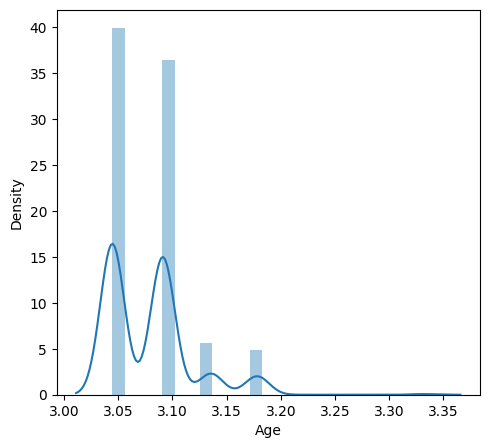

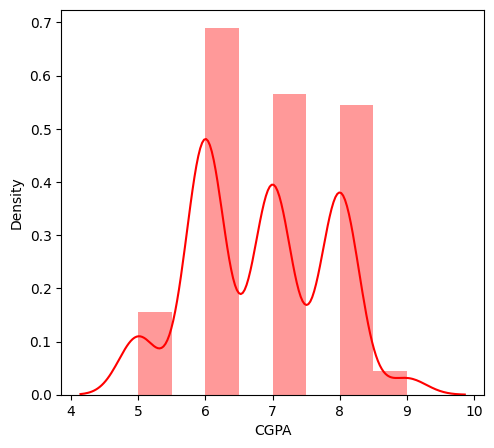

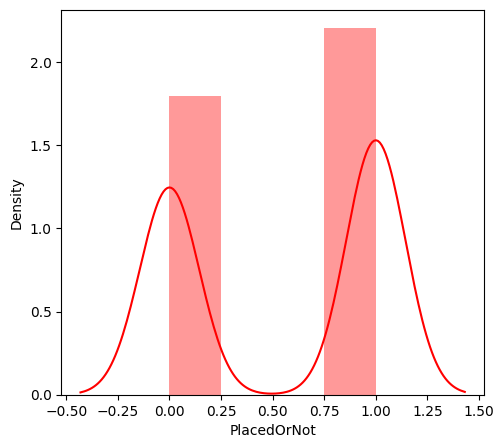

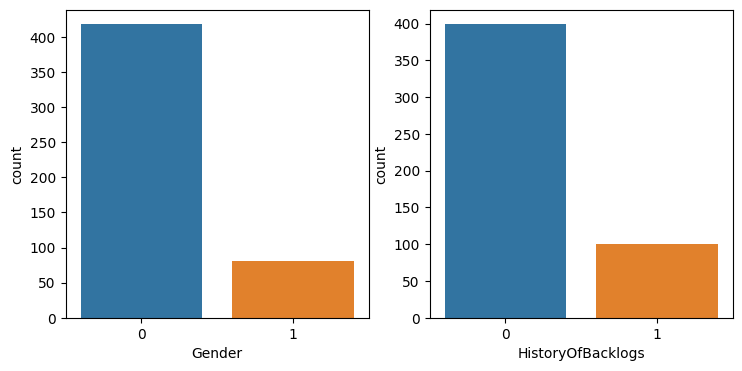

<Axes: xlabel='PlacedOrNot', ylabel='count'>

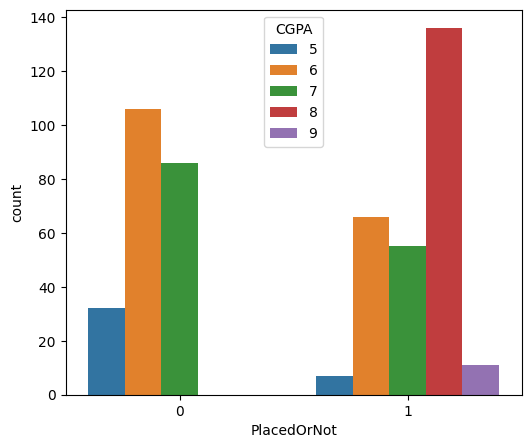

In [5]:
#import libraries
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score 
#read the dataset
df=pd.read_excel("D:\my python\placement2.xlsx")
df.head()

df.shape


df.info()

df.isnull().sum()

def transformationplot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(feature)
transformationplot(np.log(df["Age"]))



# 

#handing categorical values
df=df.replace(["Male"],[0])
df=df.replace(["Female"],[1])
df=df.replace(["Civil","Computer Science","Electrical","Electronics And Communication","Information Technology","Mechanical"],
             [0,1,2,3,4,5])
df=df.drop(["Hostel"],axis=1)
df


#Data analysis,visual analysis,univariate analysis 
plt.figure(figsize=(12,5)) 
plt.subplot(1,2,1)
sns.distplot(df["CGPA"],color="r")




plt.figure(figsize=(12,5)) 
plt.subplot(1,2,1)
sns.distplot(df["PlacedOrNot"],color="r")






#Bivariate analysis ,plotting the count plot 
plt.figure(figsize=(18,4)) 
plt.subplot(1,4,1)
sns.countplot(x="Gender",data=df)
plt.subplot(1,4,2)
sns.countplot(x="HistoryOfBacklogs",data=df)
plt.show()



#multivariate analysis 
plt.figure(figsize=(20,5)) 
plt.subplot(131)
sns.countplot(data=df,x="PlacedOrNot",hue="CGPA")






















C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 42.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='PlacedOrNot', ylabel='CGPA'>

C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 63.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 64.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


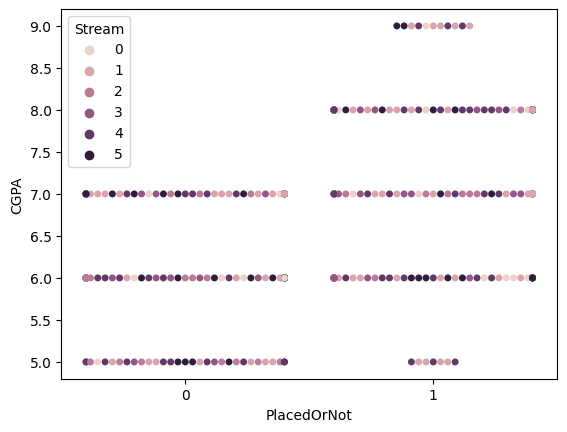

In [6]:
sns.swarmplot(data=df,x="PlacedOrNot",y="CGPA",hue=df["Stream"])

In [7]:
#spliting the data  into train and test 
X=df.iloc[:,df.columns!="PlacedOrNot"]
Y=df.iloc[:,df.columns=="PlacedOrNot"] 
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)
xtrain.head() 

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
47,21,0,3,1,7,1
482,21,1,1,0,8,1
498,22,0,5,0,7,1
426,22,0,5,0,8,1
378,21,0,5,1,6,1


In [20]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model1=model.fit(xtrain,ytrain.values.ravel()) #fi

In [21]:
#predict output 
predict_output=model1.predict(xtest) #to test the alg 
print(predict_output)



[1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0
 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1]


In [22]:
#to check accuracy  
acc=accuracy_score(predict_output,ytest)
print("The accuracy score for Rf",acc)

The accuracy score for Rf 0.8


In [11]:
import pickle
pickle.dump(model,open("myplacementnow.pkl","wb"))
Model=pickle.load(open("myplacementnow.pkl","rb")) 


